# Feature Engineering Lab: Spotify Track Features Dataset

## Lab Objectives
By the end of this lab, students will be able to:
1. Understand different types of feature engineering techniques
2. Apply mathematical transformations on audio features
3. Create categorical features from numerical data
4. Generate interaction and combination features
5. Handle temporal data and extract meaningful patterns
6. Evaluate feature importance and selection techniques

## Cell 1: Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

**Explanation**: We import essential libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and preprocessing (sklearn). These are the core tools for feature engineering.


## Cell 2: Load and Explore the Dataset

In [ ]:
import kagglehub

# Download latest version - https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

!cp -r "$path" /content/

df = pd.read_csv("/content/-spotify-tracks-dataset/dataset.csv")

print(f"Dataset shape: {df.shape}")
df.head()



Path to dataset files: /kaggle/input/-spotify-tracks-dataset
Dataset shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Explanation**: Load the dataset and check its basic structure. Understanding your data is the first step in feature engineering.


## Cell 3: Basic Dataset Information

In [ ]:
print("Dataset Info:")
df.info()
print(f"\nMissing values:\n{df.isnull().sum()}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  livene

**Explanation**: Examine data types and missing values. This information guides our feature engineering strategy and helps identify data quality issues.


## Cell 4: Statistical Summary of Audio Features

In [ ]:
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df[audio_features].describe()

,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.566800,0.641383,0.474068,0.314910,0.156050,0.213553,0.084652
std,0.173542,0.251529,0.259261,0.332523,0.309555,0.190378,0.105732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,0.260000,0.016900,0.000000,0.098000,0.035900
50%,0.580000,0.685000,0.464000,0.169000,0.000042,0.132000,0.048900
75%,0.695000,0.854000,0.683000,0.598000,0.049000,0.273000,0.084500
max,0.985000,1.000000,0.995000,0.996000,1.000000,1.000000,0.965000


**Explanation**: Audio features are numerical values between 0-1. Understanding their distributions helps us decide which transformations to apply.


## Cell 5: Visualize Feature Distributions

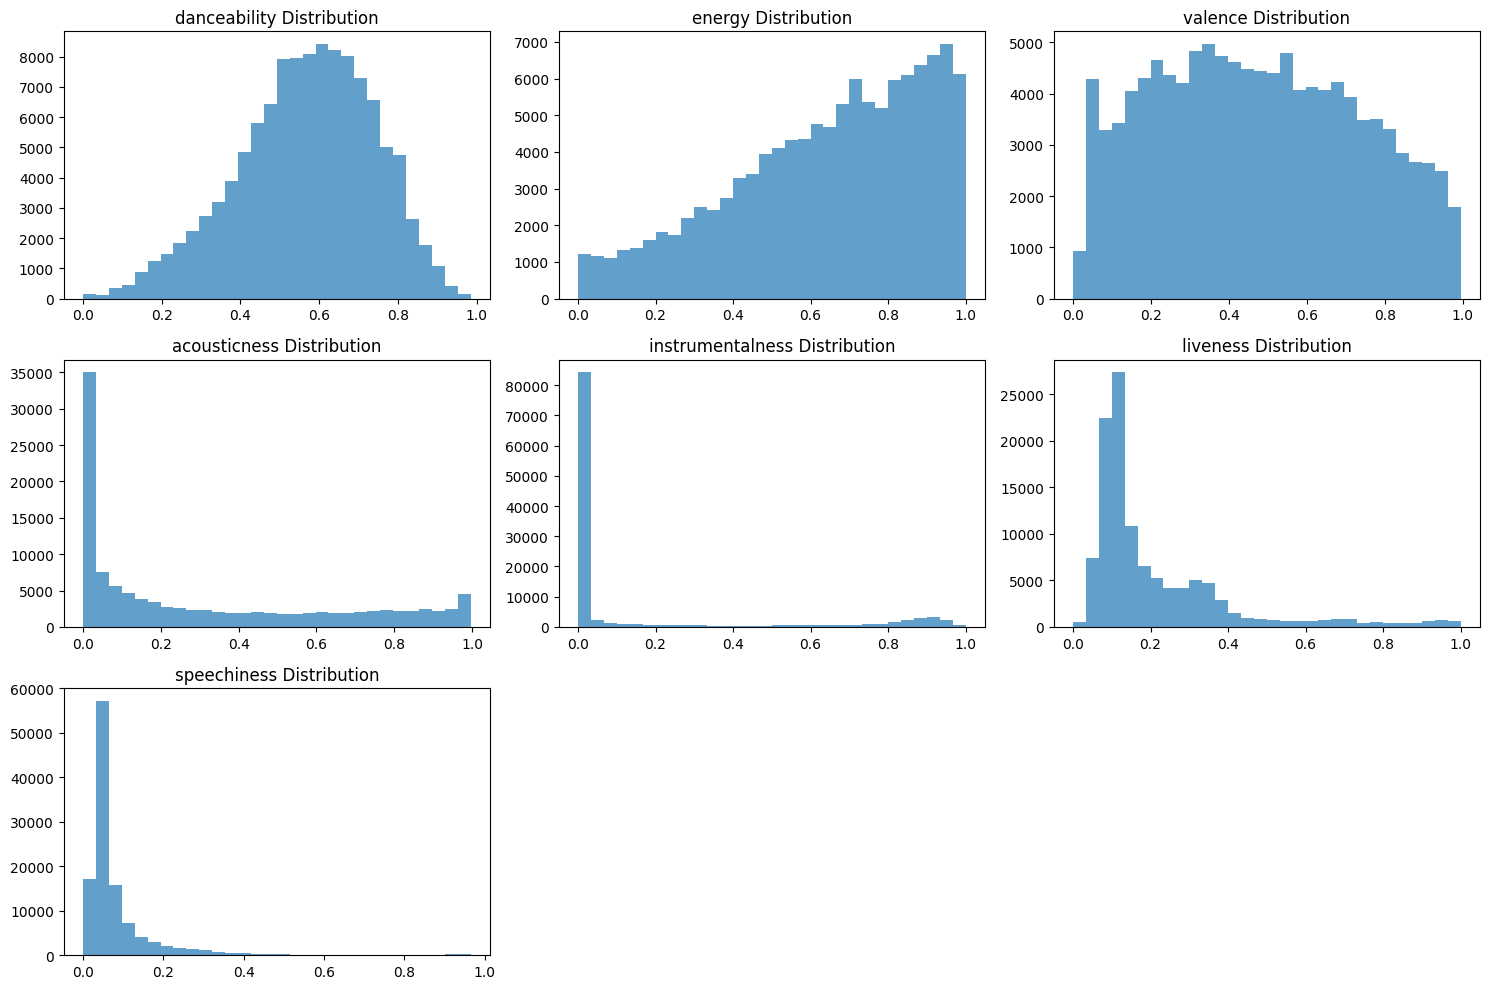

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=30, alpha=0.7)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

### Interpretation of the plots

* **danceability** → Normally distributed around 0.6.
* **energy** → Skews toward higher values (more energetic songs).
* **valence** → Fairly uniform, with fewer songs at extremes.
* **acousticness** → Strong peak near 0.0 (most songs not acoustic) with a smaller peak near 1.0.
* **instrumentalness** → Almost all values near 0.0 (few instrumental tracks) with a small bump near 1.0.
* **liveness** → Most songs are in the 0.1–0.2 range (few live performances).
* **speechiness** → Strongly skewed toward low values (most songs are not spoken word).

**Explanation**: Visualizing distributions reveals skewness, outliers, and patterns that inform our feature engineering decisions.


## Cell 6: Feature Engineering - Musical Mood Categories


In [ ]:
def create_mood(row):
    if row['valence'] > 0.6 and row['energy'] > 0.6: return 'Happy_Energetic'
    elif row['valence'] > 0.6 and row['energy'] <= 0.6: return 'Happy_Calm'
    elif row['valence'] <= 0.4 and row['energy'] > 0.6: return 'Sad_Energetic'
    else: return 'Sad_Calm'

df['mood_category'] = df.apply(create_mood, axis=1)

In [ ]:
df['mood_category'].head(10)

,mood_category
0,Happy_Calm
1,Sad_Calm
2,Sad_Calm
3,Sad_Calm
4,Sad_Calm
5,Happy_Calm
6,Sad_Calm
7,Happy_Calm
8,Happy_Calm
9,Sad_Energetic


**Explanation**: We create meaningful categorical features by combining numerical features. This captures musical mood, which is more interpretable than individual features.


In [ ]:
df['mood_category'].value_counts()

,count
mood_category,
Sad_Calm,51644
Happy_Energetic,28741
Sad_Energetic,23690
Happy_Calm,9925


## Cell 7: Tempo-Based Categories


In [ ]:
# Create tempo categories
df['tempo_category'] = pd.cut(df['tempo'],
                             bins=[0, 90, 120, 140, 200],
                             labels=['Slow', 'Moderate', 'Fast', 'Very_Fast'])


In [ ]:
df['tempo_category'].unique()

['Slow', 'Very_Fast', 'Moderate', 'Fast', NaN]
Categories (4, object): ['Slow' < 'Moderate' < 'Fast' < 'Very_Fast']

In [ ]:
df['tempo_category'].value_counts()

,count
tempo_category,
Moderate,36935
Fast,31354
Very_Fast,28729
Slow,16245


**Explanation**: Converting continuous tempo values into categories makes the feature more interpretable and can improve model performance for certain algorithms.


## Cell 8: Audio Feature Interactions

In [ ]:
# To Delete - To understand the values in the energy column
df['energy'].value_counts().head(5)

,count
energy,
0.876,318
0.937,269
0.931,261
0.801,258
0.886,258


In [ ]:
# Create interaction features
df['energy_danceability'] = df['energy'] * df['danceability']
df['acousticness_energy_ratio'] = df['acousticness'] / (df['energy'] + 0.001)  # Add small constant to avoid division by zero
df['valence_energy_sum'] = df['valence'] + df['energy']

**Explanation**: Interaction features capture relationships between variables that individual features might miss. These combinations often reveal important patterns.


## Cell 9: Audio Complexity Score

In [ ]:
# Create a composite audio complexity score
df['audio_complexity'] = (df['acousticness'] + df['instrumentalness'] +
                         (1 - df['energy']) + (1 - df['danceability'])) / 4
df['audio_complexity'] = df['audio_complexity'].round(3)

**Explanation**: Composite scores combine multiple features into a single meaningful metric. This complexity score represents how "complex" or "artistic" a track might be.


## Cell 10: Duration-Based Features

In [ ]:
# Convert duration from milliseconds to minutes and create categories
df['duration_minutes'] = df['duration_ms'] / 60000
df['duration_category'] = pd.cut(df['duration_minutes'],
                                bins=[0, 2, 3, 4, 10],
                                labels=['Short', 'Normal', 'Long', 'Very_Long'])

**Explanation**: Time-based features are important in music analysis. Converting to meaningful units and categories makes the feature more useful for analysis.


## Cell 11: Popularity-Based Features

In [ ]:
# Create popularity categories and relative popularity within artists
df['popularity_category'] = pd.cut(df['popularity'],
                                  bins=[0, 30, 50, 70, 100],
                                  labels=['Low', 'Medium', 'High', 'Very_High'])
df['artist_avg_popularity'] = df.groupby('artists')['popularity'].transform('mean')

In [ ]:
print(df[['artists', 'artist_avg_popularity']].head(20))

                                 artists  artist_avg_popularity
0                            Gen Hoshino              58.000000
1                           Ben Woodward              42.923077
2                 Ingrid Michaelson;ZAYN              57.000000
3                           Kina Grannis              53.933333
4                       Chord Overstreet              41.727273
5                           Tyrone Wells              48.250000
6   A Great Big World;Christina Aguilera              63.000000
7                             Jason Mraz              27.725490
8              Jason Mraz;Colbie Caillat              71.000000
9                         Ross Copperman              50.750000
10                          Zack Tabudlo              61.812500
11                            Jason Mraz              27.725490
12                              Dan Berk              52.000000
13                         Anna Hamilton              53.333333
14              Chord Overstreet;Deepend

**Explanation**: Popularity features help understand commercial success. Artist average popularity provides context for individual track popularity.


## Cell 12: Key and Mode Musical Features

In [ ]:
print(df[['key', 'mode']].head(20))

    key  mode
0     1     0
1     1     1
2     0     1
3     0     1
4     2     1
5     6     1
6     2     1
7    11     1
8     0     1
9     1     1
10    8     1
11    4     1
12    7     0
13    3     1
14    2     1
15    4     1
16    2     1
17   10     0
18    0     1
19    3     1


In [ ]:
# Encode musical keys and create key-mode combinations
df['key_mode'] = df['key'].astype(str) + '_' + df['mode'].astype(str)
df['is_major_key'] = (df['mode'] == 1).astype(int)

In [ ]:
df['key_mode'].value_counts().head()

,count
key_mode,
0_1,10197
7_1,10149
2_1,9062
1_1,7177
9_1,6860


In [ ]:
df['is_major_key'].value_counts().head()

,count
is_major_key,
1,72681
0,41319


**Explanation**: Musical keys and modes affect the emotional tone of songs. Creating combinations and binary indicators captures these musical theory concepts.


## Cell 13: Logarithmic Transformations

In [ ]:
# Apply log transformations to skewed features
df['log_loudness'] = np.log(df['loudness'] - df['loudness'].min() + 1)
df['sqrt_popularity'] = np.sqrt(df['popularity'])

**Explanation**: Log and square root transformations help normalize skewed distributions, making features more suitable for many machine learning algorithms.


## Cell 14: Standardization and Scaling

In [ ]:
# Standardize audio features for machine learning
scaler = StandardScaler()
audio_features_scaled = scaler.fit_transform(df[audio_features])
df_scaled = pd.DataFrame(audio_features_scaled, columns=[f'{col}_scaled' for col in audio_features])
df = pd.concat([df, df_scaled], axis=1)

In [ ]:
df_scaled.head()

,danceability_scaled,energy_scaled,valence_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,speechiness_scaled
0,0.629244,-0.717148,0.929306,-0.850202,-0.504109,0.758743,0.551848
1,-0.845908,-1.889980,-0.798690,1.831732,-0.504094,-0.591211,-0.078993
2,-0.742186,-1.122669,-1.365688,-0.315499,-0.504112,-0.507167,-0.273826
3,-1.733304,-2.312994,-1.276974,1.774593,-0.503883,-0.428376,-0.457309
4,0.295030,-0.788711,-1.184403,0.463399,-0.504112,-0.686285,-0.303145


**Explanation**: Standardization ensures all features have similar scales, preventing features with larger ranges from dominating machine learning models.


## Cell 15: One-Hot Encoding for Categorical Features

In [ ]:
# One-hot encode categorical features
categorical_features = ['mood_category', 'tempo_category', 'popularity_category']
df_encoded = pd.get_dummies(df[categorical_features], prefix=categorical_features)
df = pd.concat([df, df_encoded], axis=1)

In [ ]:
df_encoded.head()

,mood_category_Happy_Calm,mood_category_Happy_Energetic,mood_category_Sad_Calm,mood_category_Sad_Energetic,tempo_category_Slow,tempo_category_Moderate,tempo_category_Fast,tempo_category_Very_Fast,popularity_category_Low,popularity_category_Medium,popularity_category_High,popularity_category_Very_High
0,True,False,False,False,True,False,False,False,False,False,False,True
1,False,False,True,False,True,False,False,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,True,False
3,False,False,True,False,False,False,False,True,False,False,False,True
4,False,False,True,False,False,True,False,False,False,False,False,True


**Explanation**: One-hot encoding converts categorical variables into numerical format required by most machine learning algorithms while preserving categorical relationships.


## Cell 16: Feature Selection - Correlation Analysis

In [ ]:
# Calculate correlation matrix for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

**Explanation**: Correlation analysis helps identify redundant features and relationships between variables, guiding feature selection decisions.


## Cell 17: Visualize Feature Correlations

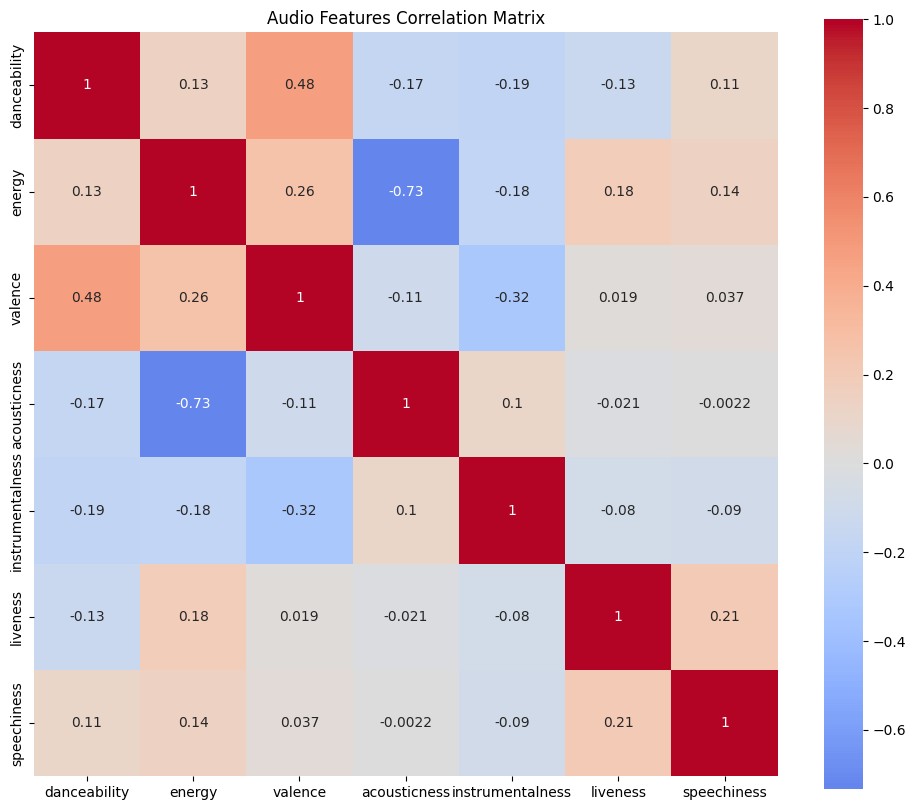

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[audio_features].loc[audio_features],
           annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Audio Features Correlation Matrix')
plt.show()


## **High correlations (|correlation| ≥ 0.4)**

### **Positive correlations**

1. **Danceability & Valence** → **0.48**

   * Songs that are more danceable tend to have higher valence (more positive or happy mood).
2. **Energy & Valence** → **0.26** (moderate, but not as high as the threshold) — not in high category but worth noting.

---

### **Negative correlations**

1. **Energy & Acousticness** → **-0.73**

   * Songs with high energy tend to be less acoustic (more electronic/amplified production). This is the strongest correlation in the matrix.

---

## **Interpretation of the Figure**

* **Diagonal values** are all **1** because each feature is perfectly correlated with itself.
* **Color scale**:

  * **Dark red** → Strong positive correlation.
  * **Dark blue** → Strong negative correlation.
  * **Light colors** → Weak or no correlation.
* **Key insights**:

  * **Energy** and **Acousticness** have a strong **inverse** relationship.
  * **Danceability** and **Valence** have a moderately strong **positive** relationship, suggesting upbeat/happy songs are often danceable.
  * Most other feature pairs show weak correlations (near 0), meaning they measure largely independent aspects of the audio.


**Explanation**: Visualization helps identify highly correlated features that might be redundant and should be considered for removal to avoid multicollinearity.

## Cell 18: Feature Importance Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare features for modeling (selecting numerical features only)
feature_cols = [col for col in df.columns if col.endswith('_scaled') or
               col in ['audio_complexity', 'duration_minutes', 'energy_danceability']]
X = df[feature_cols].fillna(0)
y = df['popularity']

**Explanation**: We prepare our engineered features for machine learning. Random Forest will help us understand which engineered features are most important for predicting popularity.


## Cell 19: Train Model and Get Feature Importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})

In [ ]:
feature_importance.head(10).sort_values(by='importance', ascending=False)

,feature,importance
2,duration_minutes,0.122620
5,valence_scaled,0.116183
9,speechiness_scaled,0.116102
6,acousticness_scaled,0.111291
8,liveness_scaled,0.102656
3,danceability_scaled,0.094958
0,energy_danceability,0.090128
4,energy_scaled,0.086595
7,instrumentalness_scaled,0.082098
1,audio_complexity,0.077370


**Explanation**: Training a Random Forest model allows us to evaluate which of our engineered features are most predictive of track popularity.


### **1. Importing libraries**

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
```

* **`RandomForestRegressor`** → Machine learning model that builds multiple decision trees and averages their predictions for regression tasks.
* **`train_test_split`** → Utility to split data into training and test sets.

---

### **2. Selecting features**

```python
feature_cols = [col for col in df.columns if col.endswith('_scaled') or
               col in ['audio_complexity', 'duration_minutes', 'energy_danceability']]
```

* **`col.endswith('_scaled')`** → Picks all numeric features that have been scaled (normalized or standardized earlier).
* Also explicitly includes:

  * **`audio_complexity`** → Calculated feature.
  * **`duration_minutes`** → Song length in minutes.
  * **`energy_danceability`** → Engineered feature combining energy & danceability.

---

### **3. Preparing X (features) and y (target)**

```python
X = df[feature_cols].fillna(0)
y = df['popularity']
```

* **`X`** → The independent variables (predictors). Missing values are replaced with **0**.
* **`y`** → The dependent variable (target) is **song popularity**.

---

### **4. Splitting into training and test sets**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

* **80%** of data → training set.
* **20%** of data → test set.
* **`random_state=42`** → Ensures reproducible results.

---

### **5. Training the Random Forest model**

```python
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
```

* **`n_estimators=100`** → Uses 100 decision trees.
* Fits the model on training data to learn relationships between features and popularity.

---

### **6. Extracting feature importance**

```python
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
```

* **`rf_model.feature_importances_`** → Measures how much each feature contributed to reducing prediction error across all trees.
* Stored in a DataFrame with columns:

  * **feature** → Feature name.
  * **importance** → Relative importance score.

## Cell 20: Visualize Feature Importance

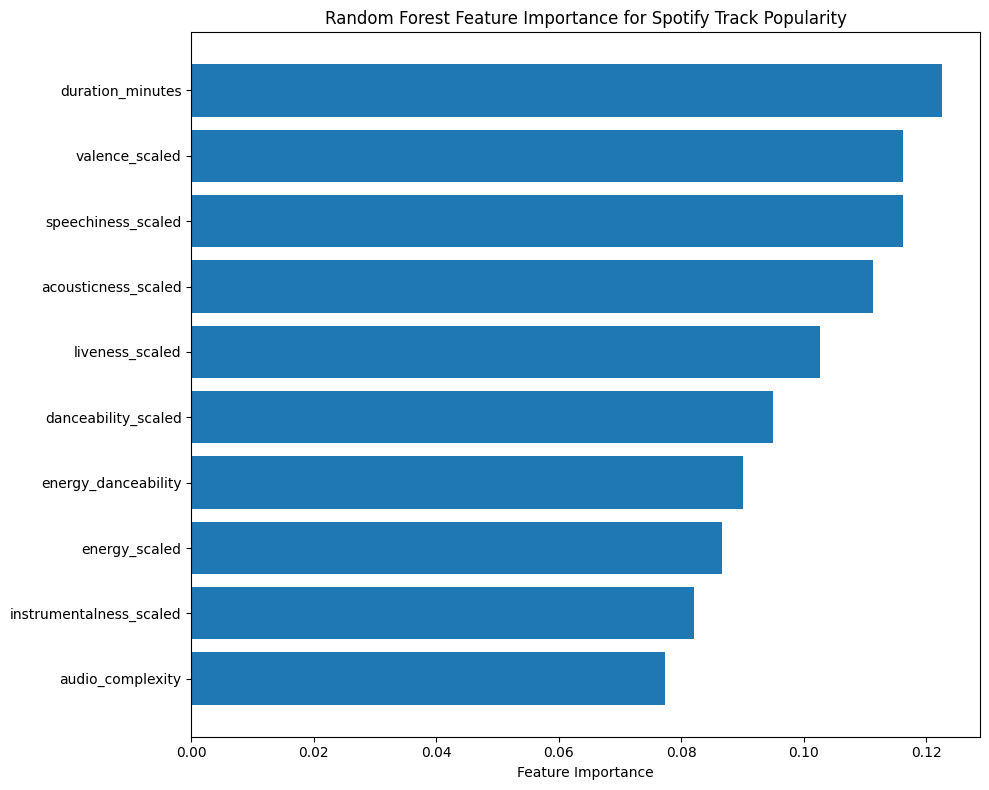

In [ ]:
feature_importance_sorted = feature_importance.sort_values('importance', ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_sorted['feature'], feature_importance_sorted['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Spotify Track Popularity')
plt.tight_layout()
plt.show()

**Explanation**: Visualizing feature importance helps validate our feature engineering efforts and identifies which engineered features add the most value.


## Cell 21: Create Final Engineered Dataset Summary

In [ ]:
print("Feature Engineering Summary:")
print(f"Original features: {len(audio_features + ['popularity', 'duration_ms', 'tempo'])}")
print(f"Total engineered features: {len(df.columns)}")
print(f"New categorical features: {len(categorical_features)}")
print(f"Interaction features: 3")
print(f"Scaled features: {len(audio_features)}")
engineered_features = [col for col in df.columns if any(x in col for x in ['_scaled', '_category', 'mood_', 'audio_complexity', 'energy_danceability'])]
print(f"Key engineered features: {len(engineered_features)}")

Feature Engineering Summary:
Original features: 10
Total engineered features: 54
New categorical features: 3
Interaction features: 3
Scaled features: 7
Key engineered features: 25


**Explanation**: This summary shows the impact of our feature engineering process, demonstrating how we've transformed and expanded our original dataset.


## Cell 22: Save Engineered Dataset


In [ ]:
# Save the engineered dataset
engineered_columns = (['track_name', 'artists'] + audio_features + engineered_features +
                     ['popularity', 'duration_minutes', 'audio_complexity'])
df_final = df[engineered_columns].copy()
df_final.to_csv('spotify_tracks_engineered.csv', index=False)
print("Engineered dataset saved successfully!")
print(f"Final dataset shape: {df_final.shape}")

Engineered dataset saved successfully!
Final dataset shape: (114000, 37)


**Explanation**: Saving our engineered dataset preserves our work and creates a clean dataset ready for machine learning modeling or further analysis.


## Lab Summary

### What We Accomplished:
1. **Categorical Engineering**: Created mood categories, tempo categories, and popularity tiers
2. **Interaction Features**: Combined audio features to capture relationships
3. **Composite Metrics**: Built audio complexity scores
4. **Temporal Features**: Processed duration data meaningfully  
5. **Mathematical Transformations**: Applied scaling, normalization, and log transforms
6. **Encoding**: Converted categorical data for ML compatibility
7. **Feature Selection**: Analyzed correlation and importance

### Key Takeaways:
- Feature engineering is both an art and a science
- Domain knowledge (understanding music) guides good feature creation
- Always validate engineered features with correlation analysis and importance scoring
- Balance between creating informative features and avoiding overfitting
- Different algorithms may benefit from different types of engineered features

### Next Steps:
- Try different binning strategies for categorical features
- Experiment with polynomial features
- Apply dimensionality reduction techniques (PCA, t-SNE)
- Test how different feature combinations affect various ML algorithms